In [183]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader, TensorDataset

In [162]:
import os

file_path = "jena_climate_2009_2016.csv"

# Kiểm tra xem file đã tồn tại chưa
if not os.path.exists(file_path):
    !wget https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip
    !unzip jena_climate_2009_2016.csv.zip
else:
    print("File đã tồn tại, bỏ qua bước tải xuống và giải nén.")

File đã tồn tại, bỏ qua bước tải xuống và giải nén.


In [163]:
df = pd.read_csv("jena_climate_2009_2016.csv")

df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [164]:
df = df[5::6]
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [165]:
df.index = pd.to_datetime(df['Date Time'], format = '%d.%m.%Y %H:%M:%S')
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:10:00,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
2016-12-31 20:10:00,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
2016-12-31 21:10:00,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7


<Axes: xlabel='Date Time'>

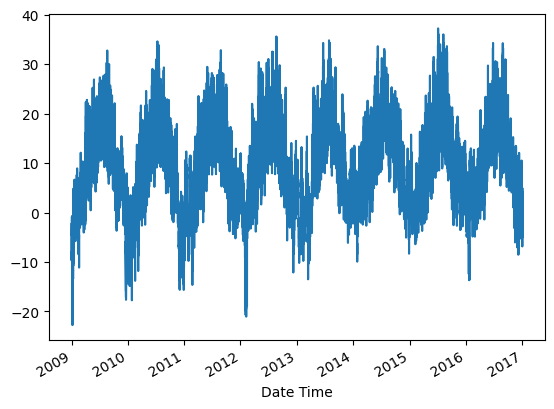

In [166]:
df['T (degC)'].plot()

In [167]:

def df_to_X_y(df, window_size = 5):
  df_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_np) - window_size):
    row = [[a] for a in df_np[i:i+5]]
    X.append(row)
    label = df_np[i + 5]
    y.append(label)
  return np.array(X), np.array(y)

In [168]:
WINDOW_SIZE = 5
X, y = df_to_X_y(df['T (degC)'], WINDOW_SIZE )
X, y = torch.tensor(X), torch.tensor(y)
X, y = X.type(torch.float32), y.type(torch.float32)
y =torch.unsqueeze(y, dim = 1)
X.shape, y.shape,type(X)

(torch.Size([70086, 5, 1]), torch.Size([70086, 1]), torch.Tensor)

In [169]:
X[0], y[0]

(tensor([[-8.0500],
         [-8.8800],
         [-8.8100],
         [-9.0500],
         [-9.6300]]),
 tensor([-9.6700]))

In [170]:
X_train, y_train = X[:65000], y[:65000]
X_test , y_test = X[65000: ], y[65000:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([65000, 5, 1]),
 torch.Size([65000, 1]),
 torch.Size([5086, 5, 1]),
 torch.Size([5086, 1]))

In [171]:
train_dataset = TensorDataset(X_train, y_train)

test_dataset = TensorDataset(X_test, y_test)

In [172]:
BATCH_SIZE = 32
train_dataloader = DataLoader(train_dataset, BATCH_SIZE, shuffle=False)
test_dataloader = DataLoader(train_dataset, BATCH_SIZE, shuffle=False)

In [173]:
class weather_model(nn.Module):
  def __init__(self, input_size):
    super().__init__()
    self.lstm = nn.LSTM(input_size=input_size, hidden_size=64, batch_first=True)
    self.fc = nn.Sequential(
        nn.Linear(in_features=64, out_features=8), nn.ReLU(),
        nn.Linear(in_features=8, out_features=1)
    )
  def forward(self, X):
    lstm_out, _ = self.lstm(X)  # LSTM trả về (output, (h_n, c_n))
    # print(f"lstm_out {lstm_out.shape}")
    last_hidden_state = lstm_out[:, -1, :]  # Lấy hidden state của timestep cuối
    output = self.fc(last_hidden_state)  # Đưa vào Fully Connected Layer
    return output

In [189]:
model_0 = weather_model(X_train.shape[2])
model_0

weather_model(
  (lstm): LSTM(1, 64, batch_first=True)
  (fc): Sequential(
    (0): Linear(in_features=64, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=1, bias=True)
  )
)

In [175]:
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print("Helper functions already exists, skipping dowload" )
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/huhj225131/SomeCNN/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

Helper functions already exists, skipping dowload


In [176]:
from helper_functions import *

In [177]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [178]:
# Create directory to store models
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok = True)

In [179]:
dummy= next(iter(train_dataloader))
dummy

[tensor([[[-8.0500],
          [-8.8800],
          [-8.8100],
          [-9.0500],
          [-9.6300]],
 
         [[-8.8800],
          [-8.8100],
          [-9.0500],
          [-9.6300],
          [-9.6700]],
 
         [[-8.8100],
          [-9.0500],
          [-9.6300],
          [-9.6700],
          [-9.1700]],
 
         [[-9.0500],
          [-9.6300],
          [-9.6700],
          [-9.1700],
          [-8.1000]],
 
         [[-9.6300],
          [-9.6700],
          [-9.1700],
          [-8.1000],
          [-7.6600]],
 
         [[-9.6700],
          [-9.1700],
          [-8.1000],
          [-7.6600],
          [-7.0400]],
 
         [[-9.1700],
          [-8.1000],
          [-7.6600],
          [-7.0400],
          [-7.4100]],
 
         [[-8.1000],
          [-7.6600],
          [-7.0400],
          [-7.4100],
          [-6.8700]],
 
         [[-7.6600],
          [-7.0400],
          [-7.4100],
          [-6.8700],
          [-5.8900]],
 
         [[-7.0400],
       

In [190]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model_0.parameters(),lr=0.1)

In [191]:
best_loss, best_acc = eval_model(model_0, test_dataloader, loss_fn, accuracy_fn, device )
best_loss, best_acc


(tensor(151.0320), 1.328740157480315)

In [192]:
#Create save path
MODEL_NAME = "model_0.pth"

MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/model_0.pth')

In [193]:
train, test = train_test_model(model_0, train_dataloader,
                 test_dataloader,loss_fn, accuracy_fn, optimizer,MODEL_SAVE_PATH,
                22, device, best_acc)

  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 11.734282493591309 | Train accuracy: 1.328740157480315 | Test loss: 14.084853172302246 | Test_acc: 1.328740157480315
Epoch: 1 | Train loss: 10.12007999420166 | Train accuracy: 1.328740157480315 | Test loss: 11.48464298248291 | Test_acc: 1.328740157480315
Epoch: 2 | Train loss: 6.380002975463867 | Train accuracy: 1.328740157480315 | Test loss: 5.2269158363342285 | Test_acc: 1.328740157480315
Epoch: 3 | Train loss: 5.0629658699035645 | Train accuracy: 1.328740157480315 | Test loss: 13.451926231384277 | Test_acc: 1.328740157480315
Epoch: 4 | Train loss: 4.8235249519348145 | Train accuracy: 1.328740157480315 | Test loss: 7.648913860321045 | Test_acc: 1.328740157480315
Epoch: 5 | Train loss: 4.125169277191162 | Train accuracy: 1.328740157480315 | Test loss: 5.810929298400879 | Test_acc: 1.328740157480315
Epoch: 6 | Train loss: 5.0312089920043945 | Train accuracy: 1.328740157480315 | Test loss: 2.9535634517669678 | Test_acc: 1.328740157480315
Epoch: 7 | Train loss: 4.7

In [194]:
torch.save(obj=model_0.state_dict(),f = MODEL_SAVE_PATH)

In [196]:
model_0 = weather_model(X_train.shape[2])

In [197]:
model_0.load_state_dict(torch.load(MODEL_SAVE_PATH, weights_only=True))

<All keys matched successfully>

Du doan 3.9631214141845703 |Thuc te: 2.5299999713897705
Du doan 7.611780166625977 |Thuc te: 6.710000038146973
Du doan 5.740150451660156 |Thuc te: 2.490000009536743
Du doan -1.2488880157470703 |Thuc te: -1.4600000381469727
Du doan 5.724849700927734 |Thuc te: 3.259999990463257
Du doan 2.452911376953125 |Thuc te: 0.75
Du doan 5.74017333984375 |Thuc te: 4.690000057220459
Du doan 5.760128021240234 |Thuc te: 5.599999904632568
Du doan 4.6054229736328125 |Thuc te: 4.050000190734863
Du doan 5.740201950073242 |Thuc te: 5.03000020980835


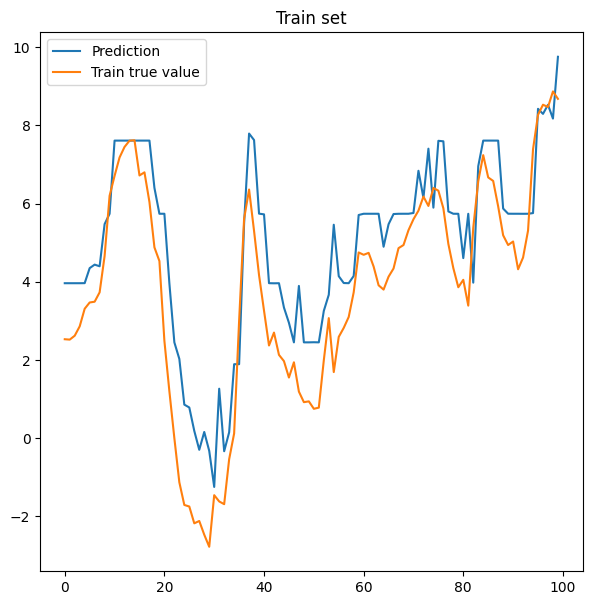

In [219]:
# Predict on train set
with torch.inference_mode():
  torch.manual_seed(30)
  sample_unit = 100
  idx= torch.randint(0, X_train.shape[0]- sample_unit  - 1, [1])
  y_pred = []

  for i in range(sample_unit):
    pred = model_0(X_train[idx + i])[0].item()
    y_pred.append(pred)
    if i % (sample_unit /10) == 0:
      print(f"Du doan {pred} |Thuc te: {y_train[idx + i].item()}")
  plt.figure(figsize=(7,7))
  plt.plot(y_pred,label="Prediction")
  plt.plot(y_train[idx : idx + sample_unit], label="Train true value")
  plt.legend()
  plt.title('Train set')
  plt.show()
# y_pred, y_train[idx : idx + 20]

Du doan 5.740287780761719 |Thuc te: 4.960000038146973
Du doan 7.806709289550781 |Thuc te: 8.529999732971191
Du doan 7.591875076293945 |Thuc te: 6.110000133514404
Du doan 5.576236724853516 |Thuc te: 3.0
Du doan 7.610439300537109 |Thuc te: 5.690000057220459
Du doan 2.4510135650634766 |Thuc te: 1.3300000429153442
Du doan 3.9660263061523438 |Thuc te: 3.069999933242798
Du doan 3.9503097534179688 |Thuc te: 2.130000114440918
Du doan 3.953153610229492 |Thuc te: 2.390000104904175
Du doan 2.4499969482421875 |Thuc te: 0.8600000143051147


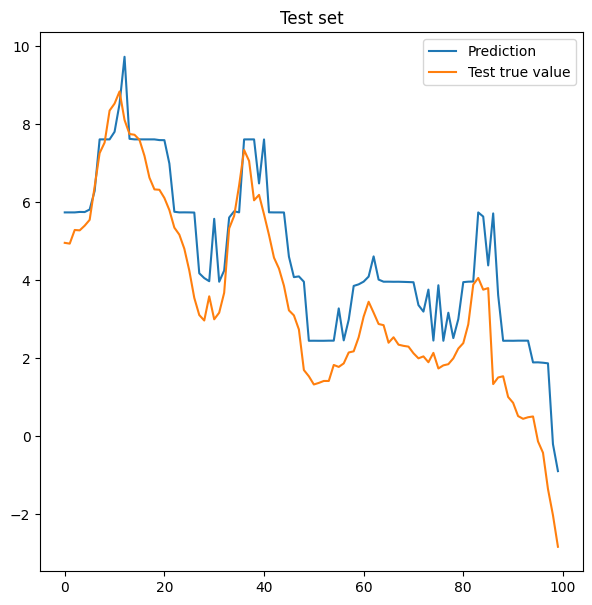

In [218]:
# Predict on test set
with torch.inference_mode():
  torch.manual_seed(0)
  sample_unit = 100
  idx= torch.randint(0, X_test.shape[0] - sample_unit - 1, [1])
  y_pred = []

  for i in range(sample_unit):
    pred = model_0(X_test[idx + i])[0].item()
    y_pred.append(pred)
    if i % (sample_unit /10) == 0:
      print(f"Du doan {pred} |Thuc te: {y_test[idx + i].item()}")
  plt.figure(figsize=(7,7))
  plt.plot(y_pred,label="Prediction")
  plt.plot(y_test[idx : idx + sample_unit], label="Test true value")
  plt.legend()
  plt.title("Test set")
  plt.show
# y_pred, y_train[idx : idx + 20]